<a href="https://colab.research.google.com/github/Taeseon-Baek/AI_Project/blob/main/AI_teamproject_developed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Team Project - Team 4

* Submission date: **2021/12/11 Tue**

* Introduction

With the Internet usage rate exceeding 91%, Internet access has become an essential part of life. The diffusion of computer networks has brought convenience to our lives. But, at the same time, it has created many network security problems. Network security problems refer to illegal information leakage, service obstruction, and system vulnerability through various protocols or networks. For system security, the role of an intrusion detection system is becoming more important. So far, many machine learning algorithms have been applied for intrusion detection systems. However, they require numerous preprocessing processes for finding useful information and data patterns. So, various deep learning-based algorithms such as MLP and CNN started to appear. Among them, a model that combines CNN and LSTM that extracts spatial and temporal information of network traffic is known to have better performance than single CNN or single LSTM models. Therefore, we will apply this CNN-LSTM model with some modifications for resolving class imbalance to the given network intrusion detection problem.



* Data

Since 1999, KDD-99 dataset  has been the most widely used data set for the evaluation of traffic classification methods. The KDD-99 dataset was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. The attacks in KDD-99 data set fall in four categories as following:
1) Denial of Service Attack (DOS): is an attack in which the attacker makes some computing or memory resource too busy or too full to handle legitimate requests, or denies legitimate users access to a machine.
2) User to Root Attack (U2R): is a class of exploit in which the attacker starts out with access to a normal user account on the system (perhaps gained by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
3) Remote to Local Attack (R2L): occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.
4) Probing attack: is an attempt to gather information about a network of computers for the apparent purpose of circumventing its security controls. 
Attack category	Data set
	KDDCup 99
Normal	972780(19.86%)
DOS	3883370(79.28%)
Probe	41102(0.84%)
R2L	1126(0.02%)
U2R	52
Table 1. Detailed Composition of KDD Cup99
For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features).
This data can be classified into normal and 4 attack types, a total of 5 classes.

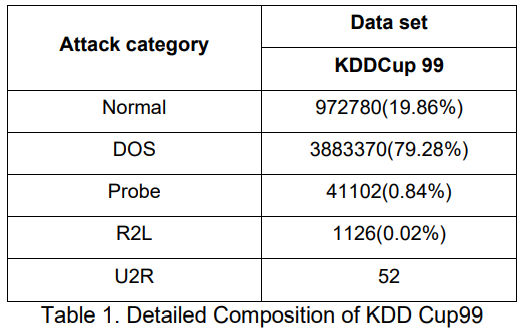


For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features).
This data can be classified into normal and 4 attack types, a total of 5 classes.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']
data = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/kddcup.data',names=columns)

In [3]:
change_value_dict = {'back.':'dos','buffer_overflow.':'u2r','ftp_write.':'r2l','guess_passwd.':'r2l','imap.':'r2l','ipsweep.':'probe','land.':'dos','loadmodule.':'u2r','multihop.':'r2l','neptune.':'dos','nmap.':'probe','perl.':'u2r','phf.':'r2l','pod.':'dos','portsweep.':'probe','rootkit.':'u2r','satan.':'probe','smurf.':'dos','spy.':'r2l','teardrop.':'dos','warezclient.':'r2l','warezmaster.':'r2l','normal.':'normal'}
data = data.replace({'label':change_value_dict})

In [4]:
from __future__ import print_function
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Lambda
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras import backend as K
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
#from keras.utils import np_utils
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

import numpy
import h5py
from tensorflow.keras import callbacks
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
from numpy import nan
import datetime
import sys
import os
import matplotlib.pyplot as plt
import json
import sqlalchemy

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['label'] = LE.fit_transform(data['label']) 
LE = LabelEncoder()
data['protocol_type'] = LE.fit_transform(data['protocol_type'])
LE = LabelEncoder()
data['service'] = LE.fit_transform(data['service']) 
LE = LabelEncoder()
data['flag'] = LE.fit_transform(data['flag']) 

In [6]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,1
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,1
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,3,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,1
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.00,4,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,24,9,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,1
4898427,0,1,24,9,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,1
4898428,0,1,24,9,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,1
4898429,0,1,24,9,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,1


In [7]:
from sklearn.model_selection import train_test_split
# train set과 test set으로 분리
x, x_test, y, testY = train_test_split(data.iloc[:,:-1],data.iloc[:,-1], test_size=0.1, random_state=10) #9:1 비율

# train set을 test set과 validation set으로 분리
X, T, Y, C = train_test_split(x,y, test_size=0.2, random_state=10) #8:2 비율


#Normalize
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_valid = np.array(C)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_valid = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


0    79.261946
1    19.873378
2     0.840944
3     0.022683
4     0.001049
dtype: float64


Text(0, 0.5, 'Frequency')

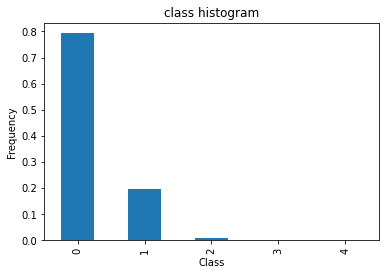

In [8]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(y_train, sort = True,normalize=True).sort_index()
print(count_classes*100)
# 클래스별 데이터 분포 확인
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# 0. base model (reference 참고해서 CNN_LSTM 모델 구현)

In [ ]:
# 이미 존재하는 모델(model_name)을 불러오는 것인지 새로 학습하는 것인지
#
#
model_name = 'CNN_LSTM_base'
filelist = os.listdir(os.getcwd())


# 불러오는 경우
if (model_name+".hdf5") in filelist:
    print(model_name+".hdf5 파일이 존재합니다. 가중치를 불러옵니다.")

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(64))
    cnn.add(Dense(5, activation="softmax"))

    cnn.load_weights(model_name+".hdf5")
else:
    # 새로운 모델을 학습하려는 경우
    print(model_name+".hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.")

    ############################################# 모델학습 #############################################
    #
    #
    #
    '''
    #Class Weight 계산
    from sklearn.utils import class_weight
    class_weight = class_weight.compute_class_weight('balanced',np.unique(Y),Y)
    class_weight = dict(zip(np.unique(Y), class_weight))
    '''

    lstm_output_size = 64

    # 모델 학습 시작
    #
    #
    #
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dense(5, activation="softmax"))

    # define optimizer and objective, compile cnn
    opt = Adam(learning_rate=0.01)
    cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

    # train
    checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #모델 성능에 향상이 있을 때마다 모델 기록
    csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #log 기록
    history = cnn.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
    cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #학습이 완료된 모델 저장


    print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #validation set으로 예측 성능 평가

    
    #loss graph

    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    

########################################### 모델 성능 평가(Evaluation) #####################################

#Normalize
scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_test = np.array(testY)

# reshape input to be [samples, time steps, features]
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))


# Test 결과

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.01)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

#np.savetxt('expected.txt', y_test, fmt='%01d')
#np.savetxt('predicted.txt', y_pred, fmt='%01d')

loss, accuracy = cnn.evaluate(X_test, y_test) #정답 set과 모델이 예측한 값을 비교하여 성능 측정
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

CNN_LSTM_base.hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.
Epoch 1/3
   703/110215 [..............................] - ETA: 22:06 - loss: 0.0930 - accuracy: 0.9718

KeyboardInterrupt: ignored

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=5))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.99194   0.99826   0.99509    388264
           1    0.97495   0.99378   0.98427     97226
           2    0.00000   0.00000   0.00000      4235
           3    0.00000   0.00000   0.00000       116
           4    0.00000   0.00000   0.00000         3

    accuracy                        0.98850    489844
   macro avg    0.39338   0.39841   0.39587    489844
weighted avg    0.97975   0.98850   0.98410    489844



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], y_pred_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()



KeyError: ignored

In [ ]:
print(roc_auc_score(pred,y_test,average="weighted"))

In [ ]:
# 1. 하이퍼파라미터 튜닝, 구조 변경

In [ ]:
#하이퍼파라미터 튜닝(learning_rate을 0.001로), Dropout layer 추가
cnn = Sequential()
cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

In [ ]:
# 2. Solving Class imbalance

In [ ]:
# 2-1. Class Weight(Weight Balancing)

In [9]:
#Class Weight 계산
import numpy as np
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y),y=y)
class_weight = dict(zip(np.unique(Y), class_weight))
class_weight

{0: 0.2523148868854936,
 1: 1.0064956902013293,
 2: 23.835997945446188,
 3: 870.4021717670287,
 4: 20039.03181818182}

In [ ]:
# 이미 존재하는 모델(model_name)을 불러오는 것인지 새로 학습하는 것인지
#
#
model_name = 'CNN_LSTM_class_weight'
filelist = os.listdir(os.getcwd())


# 불러오는 경우
if (model_name+".hdf5") in filelist:
    print(model_name+".hdf5 파일이 존재합니다. 가중치를 불러옵니다.")

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(64))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    cnn.load_weights(model_name+".hdf5")
else:
    # 새로운 모델을 학습하려는 경우
    print(model_name+".hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.")


    ############################################# 모델학습 #############################################
    #
    #
    #
    lstm_output_size = 64

    # 모델 학습 시작
    #
    #
    #
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    # define optimizer and objective, compile cnn
    opt = Adam(learning_rate=0.001)
    cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

    # train
    checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #모델 성능에 향상이 있을 때마다 모델 기록
    csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #log 기록
    history = cnn.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger],class_weight=class_weight) # class_weight="balanced"는 데이터 불균형 해소를 위한 코드
    cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #학습이 완료된 모델 저장


    print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #validation set으로 예측 성능 평가

    
    #loss graph

    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    

########################################### 모델 성능 평가(Evaluation) #####################################

#Normalize
scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_test = np.array(testY)

# reshape input to be [samples, time steps, features]
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))


# Test 결과

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

#y_pred = cnn.predict_classes(X_test) #학습된 모델로 예측한 y값
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

#np.savetxt('expected.txt', y_test, fmt='%01d')
#np.savetxt('predicted.txt', y_pred, fmt='%01d')

loss, accuracy = cnn.evaluate(X_test, y_test) #정답 set과 모델이 예측한 값을 비교하여 성능 측정
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

CNN_LSTM_class_weight.hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.
Epoch 1/10
110214/110215 [============================>.] - ETA: 0s - loss: 1.1328 - accuracy: 0.9031

In [ ]:
# 2-2. SMOTE(Over sampling)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train_over,y_train_over = smote.fit_resample(trainX, y_train)
X_train_under = np.reshape(X_train_under, (X_train_under.shape[0],X_train_under.shape[1],1))

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(y_train_over, sort = True,normalize=True).sort_index()
print(count_classes*100)
# 클래스별 데이터 분포 확인
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# 이미 존재하는 모델(model_name)을 불러오는 것인지 새로 학습하는 것인지
#
#
model_name = 'CNN_LSTM_SMOTE'
filelist = os.listdir(os.getcwd())


# 불러오는 경우
if (model_name+".hdf5") in filelist:
    print(model_name+".hdf5 파일이 존재합니다. 가중치를 불러옵니다.")

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(64))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    cnn.load_weights(model_name+".hdf5")
else:
    # 새로운 모델을 학습하려는 경우
    print(model_name+".hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.")


    ############################################# 모델학습 #############################################
    #
    #
    #
    lstm_output_size = 64

    # 모델 학습 시작
    #
    #
    #
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    # define optimizer and objective, compile cnn
    opt = Adam(learning_rate=0.001)
    cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

    # train
    checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #모델 성능에 향상이 있을 때마다 모델 기록
    csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #log 기록
    history = cnn.fit(X_train_over, y_train_over, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
    cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #학습이 완료된 모델 저장


    print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #validation set으로 예측 성능 평가

    
    #loss graph

    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    

########################################### 모델 성능 평가(Evaluation) #####################################

#Normalize
scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_test = np.array(testY)

# reshape input to be [samples, time steps, features]
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))


# Test 결과

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

#y_pred = cnn.predict_classes(X_test) #학습된 모델로 예측한 y값
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

#np.savetxt('expected.txt', y_test, fmt='%01d')
#np.savetxt('predicted.txt', y_pred, fmt='%01d')

loss, accuracy = cnn.evaluate(X_test, y_test) #정답 set과 모델이 예측한 값을 비교하여 성능 측정
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

In [ ]:
# 2-3. Edited Nearest Neighbours (Under sampling)

In [ ]:
# ENN
from imblearn.under_sampling import TomekLinks,EditedNearestNeighbours
#X_train_under, y_train_under = TomekLinks().fit_resample(trainX, y_train)
X_train_under, y_train_under = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(trainX, y_train)

X_train_under = np.reshape(X_train_under, (X_train_under.shape[0],X_train_under.shape[1],1))

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(y_train_under, sort = True,normalize=True).sort_index()
print(count_classes*100)
# 클래스별 데이터 분포 확인
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# 이미 존재하는 모델(model_name)을 불러오는 것인지 새로 학습하는 것인지
#
#
model_name = 'CNN_LSTM_ENN'
filelist = os.listdir(os.getcwd())


# 불러오는 경우
if (model_name+".hdf5") in filelist:
    print(model_name+".hdf5 파일이 존재합니다. 가중치를 불러옵니다.")

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(64))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    cnn.load_weights(model_name+".hdf5")
else:
    # 새로운 모델을 학습하려는 경우
    print(model_name+".hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.")


    ############################################# 모델학습 #############################################
    #
    #
    #
    lstm_output_size = 64

    # 모델 학습 시작
    #
    #
    #
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    # define optimizer and objective, compile cnn
    opt = Adam(learning_rate=0.001)
    cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

    # train
    checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #모델 성능에 향상이 있을 때마다 모델 기록
    csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #log 기록
    history = cnn.fit(X_train_under, y_train_under, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
    cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #학습이 완료된 모델 저장


    print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #validation set으로 예측 성능 평가

    
    #loss graph

    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    

########################################### 모델 성능 평가(Evaluation) #####################################

#Normalize
scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_test = np.array(testY)

# reshape input to be [samples, time steps, features]
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))


# Test 결과

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

#y_pred = cnn.predict_classes(X_test) #학습된 모델로 예측한 y값
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

#np.savetxt('expected.txt', y_test, fmt='%01d')
#np.savetxt('predicted.txt', y_pred, fmt='%01d')

loss, accuracy = cnn.evaluate(X_test, y_test) #정답 set과 모델이 예측한 값을 비교하여 성능 측정
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

In [ ]:
# 2-4. SMOTE+Tomek

In [ ]:
from imblearn.under_sampling import SMOTETomek, SMOTEENN
#X_train_ST, y_train_ST = SMOTETomek().fit_resample(trainX, y_train)
X_train_ST, y_train_ST = SMOTEENN().fit_resample(trainX, y_train)


X_train_ST = np.reshape(X_train_ST, (X_train_ST.shape[0],X_train_ST.shape[1],1))

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(y_train_ST, sort = True,normalize=True).sort_index()
print(count_classes*100)
# 클래스별 데이터 분포 확인
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# 이미 존재하는 모델(model_name)을 불러오는 것인지 새로 학습하는 것인지
#
#
model_name = 'CNN_LSTM_SMOTEENN'
filelist = os.listdir(os.getcwd())


# 불러오는 경우
if (model_name+".hdf5") in filelist:
    print(model_name+".hdf5 파일이 존재합니다. 가중치를 불러옵니다.")

    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(64))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    cnn.load_weights(model_name+".hdf5")
else:
    # 새로운 모델을 학습하려는 경우
    print(model_name+".hdf5 파일이 존재하지 않습니다. 새로운 모델을 학습합니다.")


    ############################################# 모델학습 #############################################
    #
    #
    #
    lstm_output_size = 64

    # 모델 학습 시작
    #
    #
    #
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(len(x.columns), 1)))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(Convolution1D(64, 3, padding="same", activation="relu"))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(LSTM(lstm_output_size))
    cnn.add(Dropout(0.1))
    cnn.add(Dense(5, activation="softmax"))

    # define optimizer and objective, compile cnn
    opt = Adam(learning_rate=0.001)
    cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

    # train
    checkpointer = callbacks.ModelCheckpoint(filepath='checkpoint_2-{epoch:02d}.hdf5', verbose=1, save_best_only=True, monitor='val_acc',mode='max') #모델 성능에 향상이 있을 때마다 모델 기록
    csv_logger = CSVLogger(os.getcwd()+'/cnntrainanalysis.csv',separator=',', append=False) #log 기록
    history = cnn.fit(X_train_ST, y_train_ST, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpointer,csv_logger])
    cnn.save("/content/gdrive/MyDrive/Colab_Notebooks/"+model_name+".hdf5") #학습이 완료된 모델 저장


    print('\nAccuracy: {:.4f}'.format(cnn.evaluate(X_valid, y_valid)[1])) #validation set으로 예측 성능 평가

    
    #loss graph

    y_vloss = history.history['val_loss']
    y_loss = history.history['loss']

    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    

########################################### 모델 성능 평가(Evaluation) #####################################

#Normalize
scaler = Normalizer().fit(x_test)
testX = scaler.transform(x_test)

y_test = np.array(testY)

# reshape input to be [samples, time steps, features]
X_test = np.reshape(testX, (testX.shape[0],testX.shape[1],1))


# Test 결과

# define optimizer and objective, compile cnn
opt = Adam(learning_rate=0.001)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=['accuracy'])

#y_pred = cnn.predict_classes(X_test) #학습된 모델로 예측한 y값
y_pred=cnn.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)

#np.savetxt('expected.txt', y_test, fmt='%01d')
#np.savetxt('predicted.txt', y_pred, fmt='%01d')

loss, accuracy = cnn.evaluate(X_test, y_test) #정답 set과 모델이 예측한 값을 비교하여 성능 측정
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
print()
print(metrics.classification_report(y_test, y_pred, digits=5))

In [ ]:
#feature_selection
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

x = x.dropna(axis=1)

estimator = ExtraTreesClassifier(n_estimators=50).fit(x,y)
selector = SelectFromModel(estimator, prefit=True, max_features=K)
select_column = x.columns[selector.get_support()]
#selectK = SelectKBest(score_func=f_classif, k=K)
#selectK.fit_transform(x, y)
#select_column = x.columns[selectK.get_support()] #select_column은 뽑힌 k개의 열
x = x[select_column]
print('selectKbest 모듈에 의해 선택된 feature는 다음과 같습니다.: '+str(list(select_column)))